<a href="https://colab.research.google.com/github/gonzalezMassini/Project-3-Playfair-Cipher-and-Vigenere-Cipher/blob/main/Project_3_Playfair_Cipher_and_Vigenere_Cipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
!pip install docx2txt
import docx2txt

my_text = docx2txt.process("/content/drive/MyDrive/Fall 2021/ICOM5018/project_F21_Ch2-1.docx")
thisDocTxt = docx2txt.process("/content/drive/MyDrive/Fall 2021/ICOM5018/project_F21_Ch2-3.docx")

In [553]:
def processingProcedure(string):
  alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ ')
  result = ''
  for i in string:
   if i.upper() in alphabet: 
    result += i.upper()
 
  return result

# Section 1: The Playfair cipher (encryption and decryption)

# Setup

In [554]:
import numpy as np
# from plyafairEncryption import playfairEncryption


def playfairSetup(keyword,plaintext):
  alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

  mtrx = np.full((5,5),'')
  string = keyword.upper()

  # remove duplicates from keyword and adds to key
  key = ''.join(sorted(set(string), key=string.index))

  # choose between J and I
  if 'I' in key and 'J' in key:
    alphabet.remove('J') 
    key = key.replace('J','')
    plaintext = plaintext.replace('J','I')
  elif 'I' in key:
    alphabet.remove('J')
    plaintext = plaintext.replace('J','I')
  elif 'J' in key:
    alphabet.remove('I')
    plaintext = plaintext.replace('I','J')
  else:
    alphabet.remove('J')
    plaintext = plaintext.replace('J','I')

  # remove letter from the alphabet that are in key
  for i in key:
    if i in alphabet:
      alphabet.remove(i)
  
  # append key with alphabet
  for i in alphabet:
    key = key + i

  # fill mtrx with key characters
  for row in mtrx:
    for i in range(len(row)):
      row[i] = key[0]
      key = key.strip(key[0])

  # print(mtrx)


  # create diagrams
  diagrams = list()
  plaintextLst = list(plaintext.upper().replace(' ',''))

  while len(plaintextLst)>0:
      if len(plaintextLst)>1:
          if not plaintextLst[0] == plaintextLst[1]:
                  diagram = plaintextLst[0] + plaintextLst[1]
                  diagrams.append(diagram)
                  plaintextLst.pop(0)
                  plaintextLst.pop(0)
          elif plaintextLst[0] == plaintextLst[1]:
              diagram = plaintext[0]+'X'
              diagrams.append(diagram)
              plaintextLst.pop(0)
      elif len(plaintextLst)==1:
          diagram = plaintextLst[0]+'X'
          diagrams.append(diagram)
          plaintextLst.pop(0)

  # print(diagrams)

  resultLst = [mtrx, diagrams]
  return resultLst

# Encryption

In [555]:
import numpy as np

def playfairEncryption(mtrx, diagrams):
 cipher=''
 for i in diagrams:
      arr1 = np.where(mtrx == i[0])
      arr2 = np.where(mtrx == i[1])
      arr1Tup = (arr1[0][0], arr1[1][0])
      arr2Tup = (arr2[0][0],arr2[1][0])
      # print(arr1Tup,arr2Tup)
      
      
      if(arr1Tup[0] == arr2Tup[0]):
          # print(i)
          # print('in the same row')
          if(arr1Tup[1]+1>4):
              frstIndex = (arr1Tup[0], 0)
          else:
              frstIndex = (arr1Tup[0], arr1Tup[1]+1)
          if(arr2Tup[1]+1>4):
              scndIndex = (arr2Tup[0],0)
          else:
              scndIndex = (arr2Tup[0], arr2Tup[1]+1)
          cipher += mtrx[frstIndex[0]][frstIndex[1]] + mtrx[scndIndex[0]][scndIndex[1]]
          # print(cipher)
          
          
      if(arr1Tup[1] == arr2Tup[1]):
          # print(i)
          # print('in the same column')
          if(arr1Tup[0]+1>4):
           frstIndex = (0,arr1Tup[1])
          else:
           frstIndex = (arr1Tup[0]+1,arr1Tup[1])
          if(arr2Tup[0]+1>4):
           scndIndex = (0,arr2Tup[1])
          else:
           scndIndex = (arr2Tup[0]+1,arr2Tup[1])
         
          
          cipher += mtrx[frstIndex[0]][frstIndex[1]] + mtrx[scndIndex[0]][scndIndex[1]]
          # print(cipher)
          
          
      if (arr1Tup[0] != arr2Tup[0] and arr1Tup[1] != arr2Tup[1]):
          # print(i)
          # print('not in same column nor row')
          cipher += mtrx[arr1Tup[0]][arr2Tup[1]] + mtrx[arr2Tup[0]][arr1Tup[1]]
          # print(cipher)
 return cipher  

# Encryption Reuslt

In [556]:
print('Encryption'+'\n')
plaintext = processingProcedure(my_text)
mtrxDgrm = playfairSetup('MAXFRESH',plaintext)
mtrx = mtrxDgrm[0]
diagrams = mtrxDgrm[1]
playfairEncryptionTxt = playfairEncryption(mtrx, diagrams)
print('Key: '+'MAXFRESH'+'\n')
print('Plaintext: ' + plaintext +'\n')

print('Ciphertext: ' + playfairEncryptionTxt)


Encryption

Key: MAXFRESH

Plaintext: CIIC  ICOMNETWORK SECURITY AND CRYPTOGRAPHYPROJECT  BASICS OF CIPHERSOVERVIEW IN THIS PROJECT YOU WILL NEED TO DESIGN AND IMPLEMENT SOME BASIC FUNCTIONS INCLUDING TEXT PROCESSING CAESAR CIPHER ENCRYPTION AND DECRYPTION AND FREQUENCY OF A SINGLE LETTER THE PROGRAMMING LANGUAGE IS PYTHONDOCUMENT REQUIREMENTSTO WORK ON THE PROJECT YOU WILL NEED TO PREPARE THREE DOCUMENTS FOLLOWING THE GUIDELINES BELOW A DESIGN DOCUMENTCOVER PAGEIT SHALL INCLUDE THE TITLE OF THE DOCUMENT YOUR NAME STUDENT ID DEPARTMENT AND UNIVERSITY INFORMATION ETCTABLE OF CONTENTSECTION  A TEXT PROCESSING PROCEDURETHE INPUT IS A STRINGTHE OUTPUT IS A STRING THAT CONTAINS ONLY ENGLISH LETTERS EACH OF WHICH MUST BE CAPITALIZEDSECTION  THE MAIN IDEAS AND PSEUDO CODE OF THE CAESAR ENCRYPTIONTHE INPUTS INCLUDE A PLAINTEXT AND A KEYTHE PLAINTEXT MUST BE THE OUTPUT OF THE PROCEDURE DESCRIBED IN SECTION THE RETURN IS A CIPHERTEXTSECTION  THE MAIN IDEAS AND PSEUDO CODE OF THE CAESAR DECRYPTIO

# Decryption

In [557]:
import numpy as np

def playfairDecryption(mtrx, diagrams):
 cipher=''
 for i in diagrams:
      arr1 = np.where(mtrx == i[0])
      arr2 = np.where(mtrx == i[1])
      arr1Tup = (arr1[0][0], arr1[1][0])
      arr2Tup = (arr2[0][0],arr2[1][0])
      # print(arr1Tup,arr2Tup)
      
      
      if(arr1Tup[0] == arr2Tup[0]):
          # print(i)
          # print('in the same row')
          if(arr1Tup[1]-1==-1):
              frstIndex = (arr1Tup[0], 4)
          else:
              frstIndex = (arr1Tup[0], arr1Tup[1]-1)
          if(arr2Tup[1]-1==-1):
              scndIndex = (arr2Tup[0],4)
          else:
              scndIndex = (arr2Tup[0], arr2Tup[1]-1)
          cipher += mtrx[frstIndex[0]][frstIndex[1]] + mtrx[scndIndex[0]][scndIndex[1]]
          # print(cipher)
          
          
      if(arr1Tup[1] == arr2Tup[1]):
          # print(i)
          # print('in the same column')
          if(arr1Tup[0]-1==-1):
           frstIndex = (4,arr1Tup[1])
          else:
           frstIndex = (arr1Tup[0]-1,arr1Tup[1])
          if(arr2Tup[0]-1==-1):
           scndIndex = (4,arr2Tup[1])
          else:
           scndIndex = (arr2Tup[0]-1,arr2Tup[1])
         
          
          cipher += mtrx[frstIndex[0]][frstIndex[1]] + mtrx[scndIndex[0]][scndIndex[1]]
          # print(cipher)
          
          
      if (arr1Tup[0] != arr2Tup[0] and arr1Tup[1] != arr2Tup[1]):
          # print(i)
          # print('not in same column nor row')
          cipher += mtrx[arr1Tup[0]][arr2Tup[1]] + mtrx[arr2Tup[0]][arr1Tup[1]]
          # print(cipher)
 return cipher    

# Decryption result

In [558]:
print('Decryption'+'\n')
mtrxDgrm = playfairSetup('MAXFRESH',playfairEncryptionTxt)
mtrx = mtrxDgrm[0]
diagrams = mtrxDgrm[1]
decryption = playfairDecryption(mtrx, diagrams)
print('Key: '+'MAXFRESH'+'\n')
print('Ciphertext: ' + playfairEncryptionTxt+'\n')
print('Plaintext: ' + decryption)

Decryption

Key: MAXFRESH

Ciphertext: HLLHLHNAUDPZTAGBSEZMLPVFUNLCWQNPLAXOBWTXPGSEQCSGLHGVRBPWBSACVACMWGHUDPPCGHTXPGSEQZNVXPHRDTHRDNNPNDHGDOMOGKXNDCEDONGVEDSFHGBRMULZGPOEDPLTMNDPLOHMNQATESHRHGODSRSHXMHLWICMDULCWQPLPOMOHRNDLCWQPLPOMOKMMCNYDUBZQASGDPIDCDCNNCCZBSTXVOMXHRXDODGRODVMDSGHQWPCPOGNEZEDONMCNYLXDEDUOCNPVPFLPOPCHNATDHLZVQVYKDDTHRDNNPTXHNXMCNCXHRDNTSMEDUOCAQHRGTXPODPCSDWDNDDKUDHCCDPVMGSHKIUNTSMEDUZLVACMOXDSLPHBRGDKTEDZNDPCCNLPDCQAPCDNTSMEDUQZNVMTXASHNZNDONKGNDOXCZEDONMONMPDUSACLPWKQMTAAXPLPOCNLZFSDCQASTONDUOCSEPLPOROHMNQATESHRHGODTXTSDNZMCNBSDPNWPLGSCOXLODPCSNZNNWPLGSCOXLODPCROSTONXGOEPOKZDUIDGHCICNNCACSMEBQAXILHEXVEQCSEXOLPRGLWDNHSLZGPONBSAXDPKGSMGSUNOHDMGNSTNDQAPCSEMSGSMCTEFZQNGPONBSDPNWOCDPLTMNSMTIXGONHMORUNFGBUPCHNGRDPNCRPEMCOCSPCSNZNNWNPRQBSTXTSDNZMDNSHLCKHDNDPHSLZGPONBSMCNZMTGHRSPWBSCZHMOCSEPLPOPCDEXGPDNDSGMOINHSMNTSNGSNRQBSSRSHXMNDLCWQPLPOPCHDOQZNHGTEDZNDRSPWBSCZHMORUNFGBUPCCMCNZMPDGSTIXGONHMOCSEPLPOPCHNHSMNTSNGCNNGCNCMXDUDPCBMMCNYDUBZQASGDPIDCDCNNCXLOMCOXLODPCHDOQZNGHSGZCD

# Section 2 Vigenere Cipher (encryption and decryption)

# Set up

In [559]:
def vigenereSetup(plaintext,keyWord):
 key = keyWord.upper()
 # append the key with its self until its length is longer than the plaintext
 while len(plaintext) > len(key):
  key += key

 # find size difference between palintext and key, and remove extra characters from the keylst.
 sizeDifference = abs(len(plaintext) - len(key))
 keyLst = list(key)
 for i in range(sizeDifference):
  keyLst.pop()

 # print('Key:        '+''.join(keyLst))
 return [plaintext, keyLst]

# Encryption

In [560]:
def vigenereEncryption(plaintext, keyLst): 
 alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
 plaintext = plaintext.upper()
 ciphertext = ''
 for i in plaintext:
  if i == ' ':
   ciphertext = ciphertext + i
  else:
   newIndexKey = alphabet.index(i)+alphabet.index(keyLst.pop(0))
   if(newIndexKey>25):
    ciphertext = ciphertext + alphabet[newIndexKey-26]
   else:
    ciphertext = ciphertext + alphabet[newIndexKey]

 return ciphertext

# Encryption Result

In [561]:
text = processingProcedure(my_text)
# plaintextKeyLst = vigenereSetup('wearediscoveredsaveyourself','deceptive')
plaintextKeyLst = vigenereSetup(text,'MAXFRESH')

plaintext = plaintextKeyLst[0]
KeyLst = plaintextKeyLst[1]
print('Encryption'+'\n')
vigenereEncryptionTxt = vigenereEncryption(plaintext, KeyLst)
print('Key: '+'MAXFRESH'+'\n')
print('Plaintext: ' + text+'\n')
print('Ciphertext: ' + vigenereEncryptionTxt+'\n')

Encryption

Key: MAXFRESH

Plaintext: CIIC  ICOMNETWORK SECURITY AND CRYPTOGRAPHYPROJECT  BASICS OF CIPHERSOVERVIEW IN THIS PROJECT YOU WILL NEED TO DESIGN AND IMPLEMENT SOME BASIC FUNCTIONS INCLUDING TEXT PROCESSING CAESAR CIPHER ENCRYPTION AND DECRYPTION AND FREQUENCY OF A SINGLE LETTER THE PROGRAMMING LANGUAGE IS PYTHONDOCUMENT REQUIREMENTSTO WORK ON THE PROJECT YOU WILL NEED TO PREPARE THREE DOCUMENTS FOLLOWING THE GUIDELINES BELOW A DESIGN DOCUMENTCOVER PAGEIT SHALL INCLUDE THE TITLE OF THE DOCUMENT YOUR NAME STUDENT ID DEPARTMENT AND UNIVERSITY INFORMATION ETCTABLE OF CONTENTSECTION  A TEXT PROCESSING PROCEDURETHE INPUT IS A STRINGTHE OUTPUT IS A STRING THAT CONTAINS ONLY ENGLISH LETTERS EACH OF WHICH MUST BE CAPITALIZEDSECTION  THE MAIN IDEAS AND PSEUDO CODE OF THE CAESAR ENCRYPTIONTHE INPUTS INCLUDE A PLAINTEXT AND A KEYTHE PLAINTEXT MUST BE THE OUTPUT OF THE PROCEDURE DESCRIBED IN SECTION THE RETURN IS A CIPHERTEXTSECTION  THE MAIN IDEAS AND PSEUDO CODE OF THE CAESAR DECRYPTIO

# Decryption

In [562]:
def vigenereDecryption(plaintext, keyLst): 
 alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
 plaintext = plaintext.upper()
 ciphertext = ''
 for i in plaintext:
  if i == ' ':
   ciphertext = ciphertext + i
  else:
   newIndexKey = alphabet.index(i)-alphabet.index(keyLst.pop(0))
   if(newIndexKey>25):
    ciphertext = ciphertext + alphabet[newIndexKey-26]
   else:
    ciphertext = ciphertext + alphabet[newIndexKey]

 return ciphertext

# Decryption Result

In [563]:
plaintextKeyLst = vigenereSetup(vigenereEncryptionTxt,'MAXFRESH')
plaintext = plaintextKeyLst[0]
KeyLst = plaintextKeyLst[1]
print('Decryption'+'\n')
decryption = vigenereDecryption(plaintext, KeyLst)
print('Key: '+'MAXFRESH'+'\n')
print('Ciphertext: ' + vigenereEncryptionTxt+'\n')
print('Plaintext: ' + decryption+'\n')

Decryption

Key: MAXFRESH

Ciphertext: OIFH  ZGGTZEQBFVC ZQCRWZXQ HZD ZWPTLVSRXUYCHYAJBHK  FSZUCP TW GAWTEOXFZWYHIBB ZR LOUS MWFNWJF YLZ NMDS ZEBI KS VLEIDS RRV PYPIJDIFA EOJJ SEKPO FRSTXAVZS FSTPMKUND YVBL WDOZJJWAUS CXJJEJ JUPEJI IFJDYMYZSF HZD AJTVQWFILS RRV MDENZVRUF AF X XZRYSQ LBYKIJ ATE MWFKJHYMFSX PSUSUXLV MK WKTETEHGJGMBSK VWXGIOJDIFAETL BFVC VZ TEJ GVGQQCQ DFY OPXL KJVH LV BRBURVW ATRBJ USUBYEKYJ JGSXOTNEK LOQ GRNUIDPZEP GVPGD M DBXZKF KACRRVRLJAVBW GEYLUT PMRPD PZCIZUI LOQ TFYCI GM FHB IFGMTQNQ DFYJ UMMB XKYVLZT FI UIHHDTJJEX SUP UKNMIJZUTV NEJGYYAQNFR WAOTXGCI GM OOKYVRLZQCQNFR  S AQXQ UISULESFSX TJVOEAZIILOQ IKULX AZ M SQWZRYATE LZKTMA US X XKVAUS TEFK GGUFAFSJ SFSK EKLCMKO XEQYVVK LMCE TW AZPOH JZJX TL OAMNKEDPLEAXVGLPAN  QMV QSPZ IAJRW SUP PPJLHG JADB TW XZL OABXRV WUORVUKMGUFHB NETMAE IKHCYVL M PIFZRLLJT XSU E CLKTEJ GPSPZTBCK QMZF BB YYI GBFPRY FJ LOQ POTTIVBDE AJJGJPNEA NE WWJFILS KLW YQTRWE MK H OIMMVVLLJTPJTXAVZ  TEJ DEAU UDBFJ EFK BSBZUS UVPE LK KLW JMEPFI HWJDYMYZ

# Section 3: The relative frequencies of letters in a string


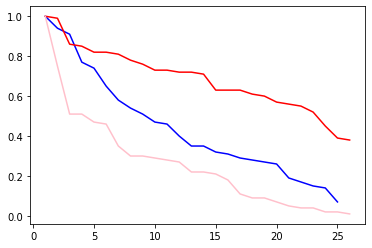

In [564]:
import matplotlib.pyplot as plt

def letterFrequency(string):
 result = list()
  
 for i in string:
    count = string.count(i)
    if not (i,count) in result:
     result.append((i,count))

 return result
 
text = processingProcedure(thisDocTxt)

plaintextKeyLst = vigenereSetup(text,'MAXFRESH')
plaintext = plaintextKeyLst[0]
KeyLst = plaintextKeyLst[1]
vigenereEncryptionTxt = vigenereEncryption(plaintext, KeyLst)
vigenereFrqLst = letterFrequency(vigenereEncryptionTxt.replace(' ',''))



mtrxDgrm = playfairSetup('MAXFRESH',text)
mtrx = mtrxDgrm[0]
diagrams = mtrxDgrm[1]
playfairEncryptionTxt = playfairEncryption(mtrx, diagrams)
playfairFrqLst = letterFrequency(playfairEncryptionTxt.replace(' ',''))



plaintextFrqLst = letterFrequency(text.replace(' ',''))


 
def relativeFrq(letterFrequencyList):
  relativeFrequency = []
  srtdFrqLst = sorted(letterFrequencyList, reverse=True, key= lambda tup: tup[1])
  maxFrq = srtdFrqLst[0][1]
  index = 1
  for i in srtdFrqLst:
        rltvFrq = float("{:.2f}".format((i[1]/maxFrq)))
        relativeFrequency.append((index,rltvFrq))
        index+=1
  return relativeFrequency      
        

        
srtdPlayfairRltvFrqLst = relativeFrq(playfairFrqLst)
srtdVigenereRltvFrqLst = relativeFrq(vigenereFrqLst)
srtPlaintextRltvFrqLst = relativeFrq(plaintextFrqLst)


def frequencyPlot(lst1,lst2,lst3):

  list1 = [(frstElem,scndElem2) for frstElem, scndElem2 in lst1]
  list2 = [(frstElem,scndElem2) for frstElem, scndElem2 in lst2]
  list3 = [(frstElem,scndElem2) for frstElem, scndElem2 in lst3]
  # srtdPlayfairRltvFrqLst
  plt.plot(*zip(*list1),color='blue')
  # srtdVigenereRltvFrqLst
  plt.plot(*zip(*list2), color='red')
  # srtPlaintextRltvFrqLst
  plt.plot(*zip(*list3), color='pink')
  plt.show()

frequencyPlot(srtdPlayfairRltvFrqLst, srtdVigenereRltvFrqLst,srtPlaintextRltvFrqLst)